<a href="https://colab.research.google.com/github/rahmashihab/Dream-11-prediction-/blob/main/Final_Cricketproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Dfdeliveries=pd.read_csv("/content/drive/MyDrive/IPL_Ball_by_Ball_2022.csv")
Dfmatches=pd.read_csv("/content/drive/MyDrive/IPL_Matches_2022.csv")

In [ ]:
Dfdeliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
Dfmatches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
Dfdeliveries = Dfdeliveries.merge(Dfmatches, on='ID')

In [ ]:
Dfdeliveries['BowlingTeam'] = np.where(Dfdeliveries['BattingTeam']==Dfdeliveries['Team1'],
                                       Dfdeliveries['Team2'],
                                       Dfdeliveries['Team1'])

In [ ]:
Dfdeliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,BowlingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans


In [ ]:
dfBatsmen = Dfdeliveries.groupby(['batter','BattingTeam'])\
            .agg({'ID':'nunique','batsman_run':'sum','isWicketDelivery':'sum'})\
            .reset_index()

In [ ]:
dfBatsmen.head()

,batter,BattingTeam,ID,batsman_run,isWicketDelivery
0,A Badoni,Lucknow Super Giants,11,161,9
1,A Manohar,Gujarat Titans,7,108,6
2,A Nortje,Delhi Capitals,1,1,0
3,A Tomar,Kolkata Knight Riders,1,4,1
4,AD Russell,Kolkata Knight Riders,12,335,9


In [ ]:
dfBatsmen.columns = ['Batter','BattingTeam','Innings','Runs','Dismissals']

In [ ]:
dfBatsmen.head()

,Batter,BattingTeam,Innings,Runs,Dismissals
0,A Badoni,Lucknow Super Giants,11,161,9
1,A Manohar,Gujarat Titans,7,108,6
2,A Nortje,Delhi Capitals,1,1,0
3,A Tomar,Kolkata Knight Riders,1,4,1
4,AD Russell,Kolkata Knight Riders,12,335,9


In [ ]:
dfBatter4s = Dfdeliveries[(Dfdeliveries ['batsman_run']==4)&(Dfdeliveries['non_boundary']==0)]\
            .groupby('batter')['ID']\
            .count()\
            .reset_index()\
            .sort_values('ID')
dfBatter4s.columns = ['Batter','4s']

In [ ]:
dfBatter4s.head()

,Batter,4s
50,KK Nair,1
25,DJ Mitchell,1
60,M Ashwin,1
28,DR Sams,1
62,M Vohra,1


In [ ]:
dfBatter6s = Dfdeliveries [(Dfdeliveries ['batsman_run']==6)&(Dfdeliveries ['non_boundary']==0)]\
            .groupby('batter')['ID']\
            .count()\
            .reset_index()\
            .sort_values('ID')
dfBatter6s.columns = ['Batter','6s']

In [ ]:
dfBatter6s.head()

,Batter,6s
55,Mohsin Khan,1
90,SE Rutherford,1
17,DJ Bravo,1
82,RV Patel,1
94,SP Jackson,1


In [ ]:
dfMatchWise = Dfdeliveries.groupby(['batter','ID'])['batsman_run'].sum().reset_index()

In [ ]:
dfMatchWise.head()

,batter,ID,batsman_run
0,A Badoni,1304050,54
1,A Badoni,1304053,19
2,A Badoni,1304058,19
3,A Badoni,1304061,10
4,A Badoni,1304066,5


In [ ]:
dfHighScore = dfMatchWise.groupby(['batter'])['batsman_run'].max().reset_index()
dfHighScore.columns = ['Batter','High Score']

In [ ]:
dfHighScore.head()

,Batter,High Score
0,A Badoni,54
1,A Manohar,43
2,A Nortje,1
3,A Tomar,4
4,AD Russell,70


In [ ]:
df50s = dfMatchWise[(dfMatchWise['batsman_run']>=50)&(dfMatchWise['batsman_run']<100)]\
        .groupby('batter')['batsman_run']\
        .count()\
        .reset_index()\
        .sort_values('batsman_run',ascending=False)
df50s.columns = ['Batter','50']

In [ ]:
df100s = dfMatchWise[(dfMatchWise['batsman_run']>=100)]\
        .groupby('batter')['batsman_run']\
        .count()\
        .reset_index()\
        .sort_values('batsman_run',ascending=False)
df100s.columns = ['Batter','100']

In [ ]:
df50s.head()

,Batter,50
10,DA Warner,5
46,Shubman Gill,4
18,JC Buttler,4
16,HH Pandya,4
23,LS Livingstone,4


In [ ]:
df100s.head()

,Batter,100
0,JC Buttler,4
1,KL Rahul,2
2,Q de Kock,1
3,RM Patidar,1


In [ ]:
dfBallsFaced = Dfdeliveries [(Dfdeliveries ['extra_type']!='wides')].groupby('batter')['ID'].count().reset_index()
dfBallsFaced.columns = ['Batter','Balls Faced']

In [ ]:
dfBallsFaced.head()

,Batter,Balls Faced
0,A Badoni,130
1,A Manohar,75
2,A Nortje,6
3,A Tomar,8
4,AD Russell,192


In [ ]:
dfBatsmen = dfBatsmen.merge(dfBallsFaced, on='Batter',how='outer').merge(dfBatter4s, on='Batter',how='outer')\
                     .merge(dfBatter6s, on='Batter',how='outer').merge(dfHighScore, on='Batter',how='outer')\
                     .merge(df50s, on='Batter',how='outer').merge(df100s, on='Batter',how='outer')

In [ ]:
dfBatsmen.head()

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100
0,A Badoni,Lucknow Super Giants,11,161,9,130,11.0,7.0,54,1.0,NaN
1,A Manohar,Gujarat Titans,7,108,6,75,14.0,3.0,43,NaN,NaN
2,A Nortje,Delhi Capitals,1,1,0,6,NaN,NaN,1,NaN,NaN
3,A Tomar,Kolkata Knight Riders,1,4,1,8,1.0,NaN,4,NaN,NaN
4,AD Russell,Kolkata Knight Riders,12,335,9,192,18.0,32.0,70,1.0,NaN


In [ ]:
dfBatsmen['Strike Rate'] = (dfBatsmen['Runs']/dfBatsmen['Balls Faced'])*100
dfBatsmen['Batting Average'] = dfBatsmen['Runs']/dfBatsmen['Dismissals']

In [ ]:
dfBatsmen.fillna(0, inplace=True)

#Batsmen dataset

In [ ]:
dfBatsmen.sort_values(by='Runs', ascending=False).head()

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average
49,JC Buttler,Rajasthan Royals,17,863,15,579,83.0,45.0,116,4.0,4.0,149.050086,57.533333
65,KL Rahul,Lucknow Super Giants,14,616,11,455,45.0,30.0,103,4.0,2.0,135.384615,56.000000
112,Q de Kock,Lucknow Super Giants,15,508,15,341,47.0,23.0,140,3.0,1.0,148.973607,33.866667
42,HH Pandya,Gujarat Titans,15,487,10,371,49.0,12.0,87,4.0,0.0,131.266846,48.700000
154,Shubman Gill,Gujarat Titans,16,483,15,365,51.0,11.0,96,4.0,0.0,132.328767,32.200000


In [ ]:
dfBatsmen.to_csv("dfBatsmen.csv",index=False)

In [ ]:
def overClassifier(val):
    if val>=0 and val<6:
        return 'Power Play'
    elif val>=6 and val<15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

In [ ]:
Dfdeliveries ['PhaseOfPlay'] = Dfdeliveries['overs'].map(overClassifier)

In [ ]:
Dfdeliveries [['overs','PhaseOfPlay']].sort_values('overs').drop_duplicates().reset_index(drop=True)

,overs,PhaseOfPlay
0,0,Power Play
1,1,Power Play
2,2,Power Play
3,3,Power Play
4,4,Power Play
5,5,Power Play
6,6,Middle Overs
7,7,Middle Overs
8,8,Middle Overs
9,9,Middle Overs


In [ ]:
dfDeathOvers = Dfdeliveries [Dfdeliveries ['PhaseOfPlay']=='Death Overs']

In [ ]:
dfDeathBowling = dfDeathOvers.groupby(['bowler','BowlingTeam']).agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()

In [ ]:
dfDeathBowling.columns = ['Bowlers','BowlingTeam','Runs Conceded','Wickets']

In [ ]:
dfDOBallsBowled = Dfdeliveries [~((Dfdeliveries ['extra_type']=='wides'))&(Dfdeliveries ['PhaseOfPlay']=='Death Overs')]\
                  .groupby('bowler')['ID']\
                  .count().reset_index()
dfDOBallsBowled.columns = ['Bowlers','Balls Bowled']

In [ ]:
dfDeathBowling = dfDeathBowling.merge(dfDOBallsBowled, on='Bowlers')

In [ ]:
dfDeathBowling['Overs'] = dfDeathBowling['Balls Bowled']/6
dfDeathBowling['Bowling Average'] = dfDeathBowling['Runs Conceded']/dfDeathBowling['Wickets']
dfDeathBowling['Bowling Strike Rate'] = dfDeathBowling['Balls Bowled']/dfDeathBowling['Wickets']
dfDeathBowling['Economy Rate'] = dfDeathBowling['Runs Conceded']/dfDeathBowling['Overs']

In [ ]:
dfDeathBowling['Bowling Strike Rate']= dfDeathBowling['Wickets']/dfDeathBowling['Balls Bowled']
dfDeathBowling['Bowling Average'] = dfDeathBowling['Wickets']/dfDeathBowling['Runs Conceded']

In [ ]:
dfDeathBowling.fillna(0, inplace=True)

In [ ]:
dfDeathBowling = dfDeathBowling.sort_values('Economy Rate',ascending=False).reset_index(drop=True)

In [ ]:
dfDeathBowling.to_csv("dfDeathBowling.csv",index=False)

#Bowlers dataset

In [ ]:
dfDeathBowling

,Bowlers,BowlingTeam,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,DG Nalkande,Gujarat Titans,6,0,1,0.166667,0.000000,0.000000,36.0
1,YBK Jaiswal,Rajasthan Royals,6,0,1,0.166667,0.000000,0.000000,36.0
2,S Dube,Chennai Super Kings,25,0,6,1.000000,0.000000,0.000000,25.0
3,HR Shokeen,Mumbai Indians,24,1,6,1.000000,0.041667,0.166667,24.0
4,DJ Hooda,Lucknow Super Giants,22,0,6,1.000000,0.000000,0.000000,22.0
...,...,...,...,...,...,...,...,...,...
94,Navdeep Saini,Rajasthan Royals,5,1,6,1.000000,0.200000,0.166667,5.0
95,SP Narine,Kolkata Knight Riders,47,2,60,10.000000,0.042553,0.033333,4.7
96,MM Ali,Chennai Super Kings,4,0,6,1.000000,0.000000,0.000000,4.0
97,M Ashwin,Mumbai Indians,3,0,6,1.000000,0.000000,0.000000,3.0


#Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Innings', ylabel='Runs'>

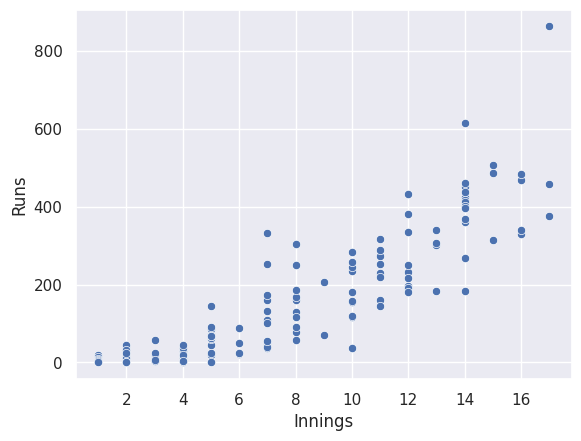

In [ ]:
sns.scatterplot(data=dfBatsmen, x='Innings', y='Runs')

<Axes: xlabel='Wickets', ylabel='Runs Conceded'>

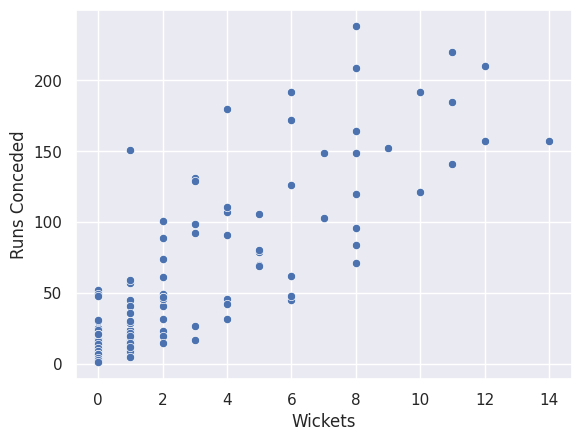

In [ ]:
markers = {1:'P', 2:'X',3:'D'}
sns.scatterplot(data=dfDeathBowling, x='Wickets', y='Runs Conceded',markers='markers')

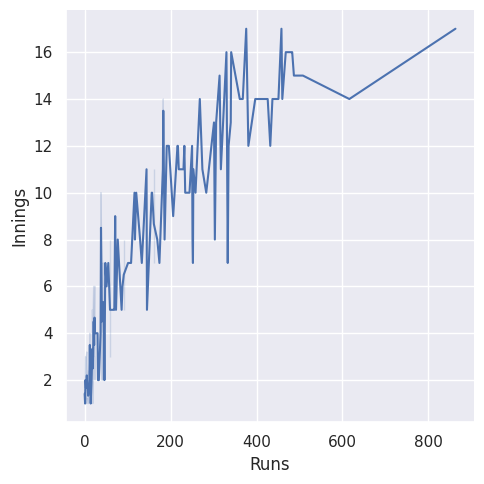

In [ ]:
sns.set_theme(style="darkgrid")

sns.relplot(data=dfBatsmen, x='Runs', y='Innings',  kind='line')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


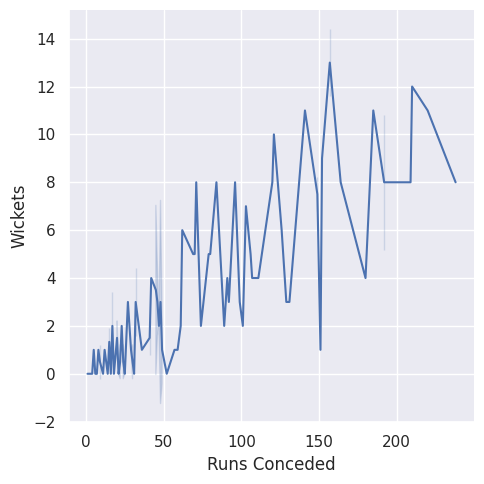

In [ ]:
sns.set_theme(style="darkgrid")

sns.relplot(data=dfDeathBowling, x='Runs Conceded', y='Wickets', ci='sd', kind='line')

<Axes: xlabel='Runs', ylabel='Count'>

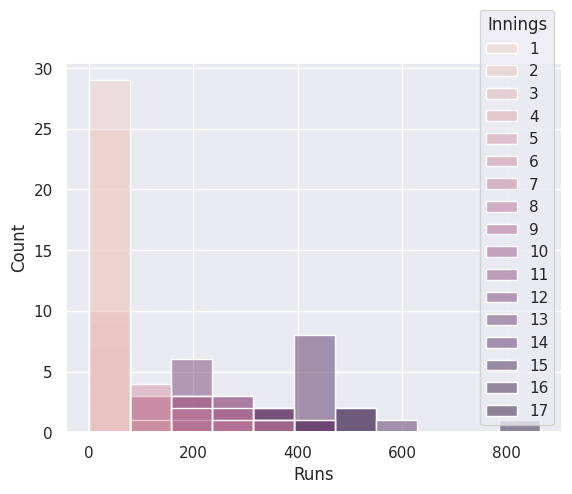

In [ ]:
sns.histplot(dfBatsmen, x="Runs",hue="Innings")

<Axes: xlabel='Runs Conceded', ylabel='Count'>

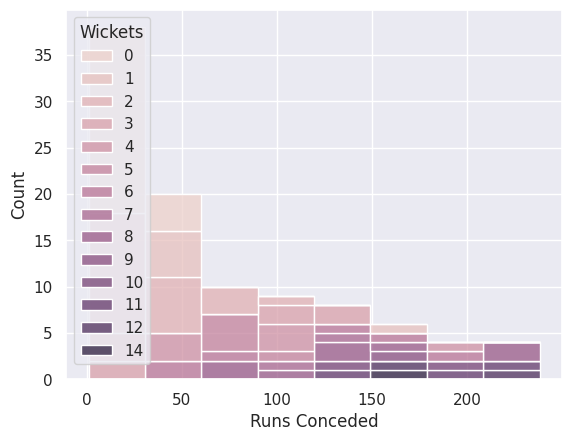

In [ ]:
sns.histplot(dfDeathBowling, x="Runs Conceded",hue="Wickets",multiple='stack')

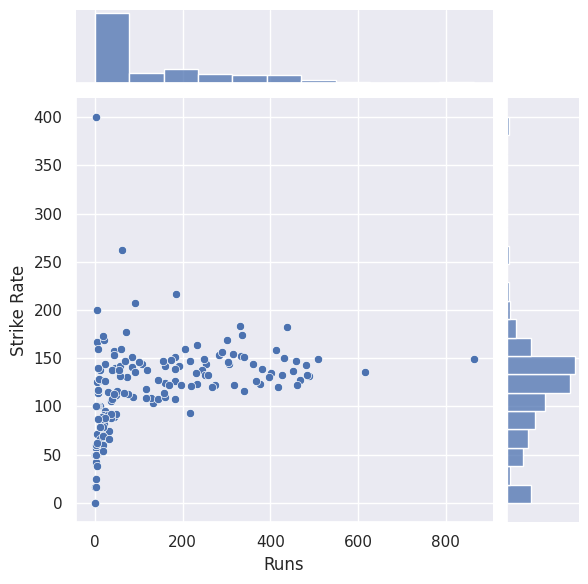

In [ ]:
sns.jointplot(data=dfBatsmen, x='Runs', y='Strike Rate')

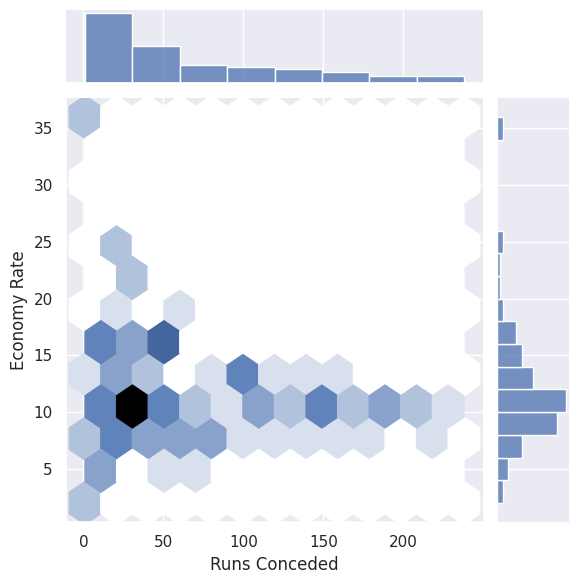

In [ ]:
sns.jointplot(data=dfDeathBowling, x='Runs Conceded', y='Economy Rate',kind='hex')

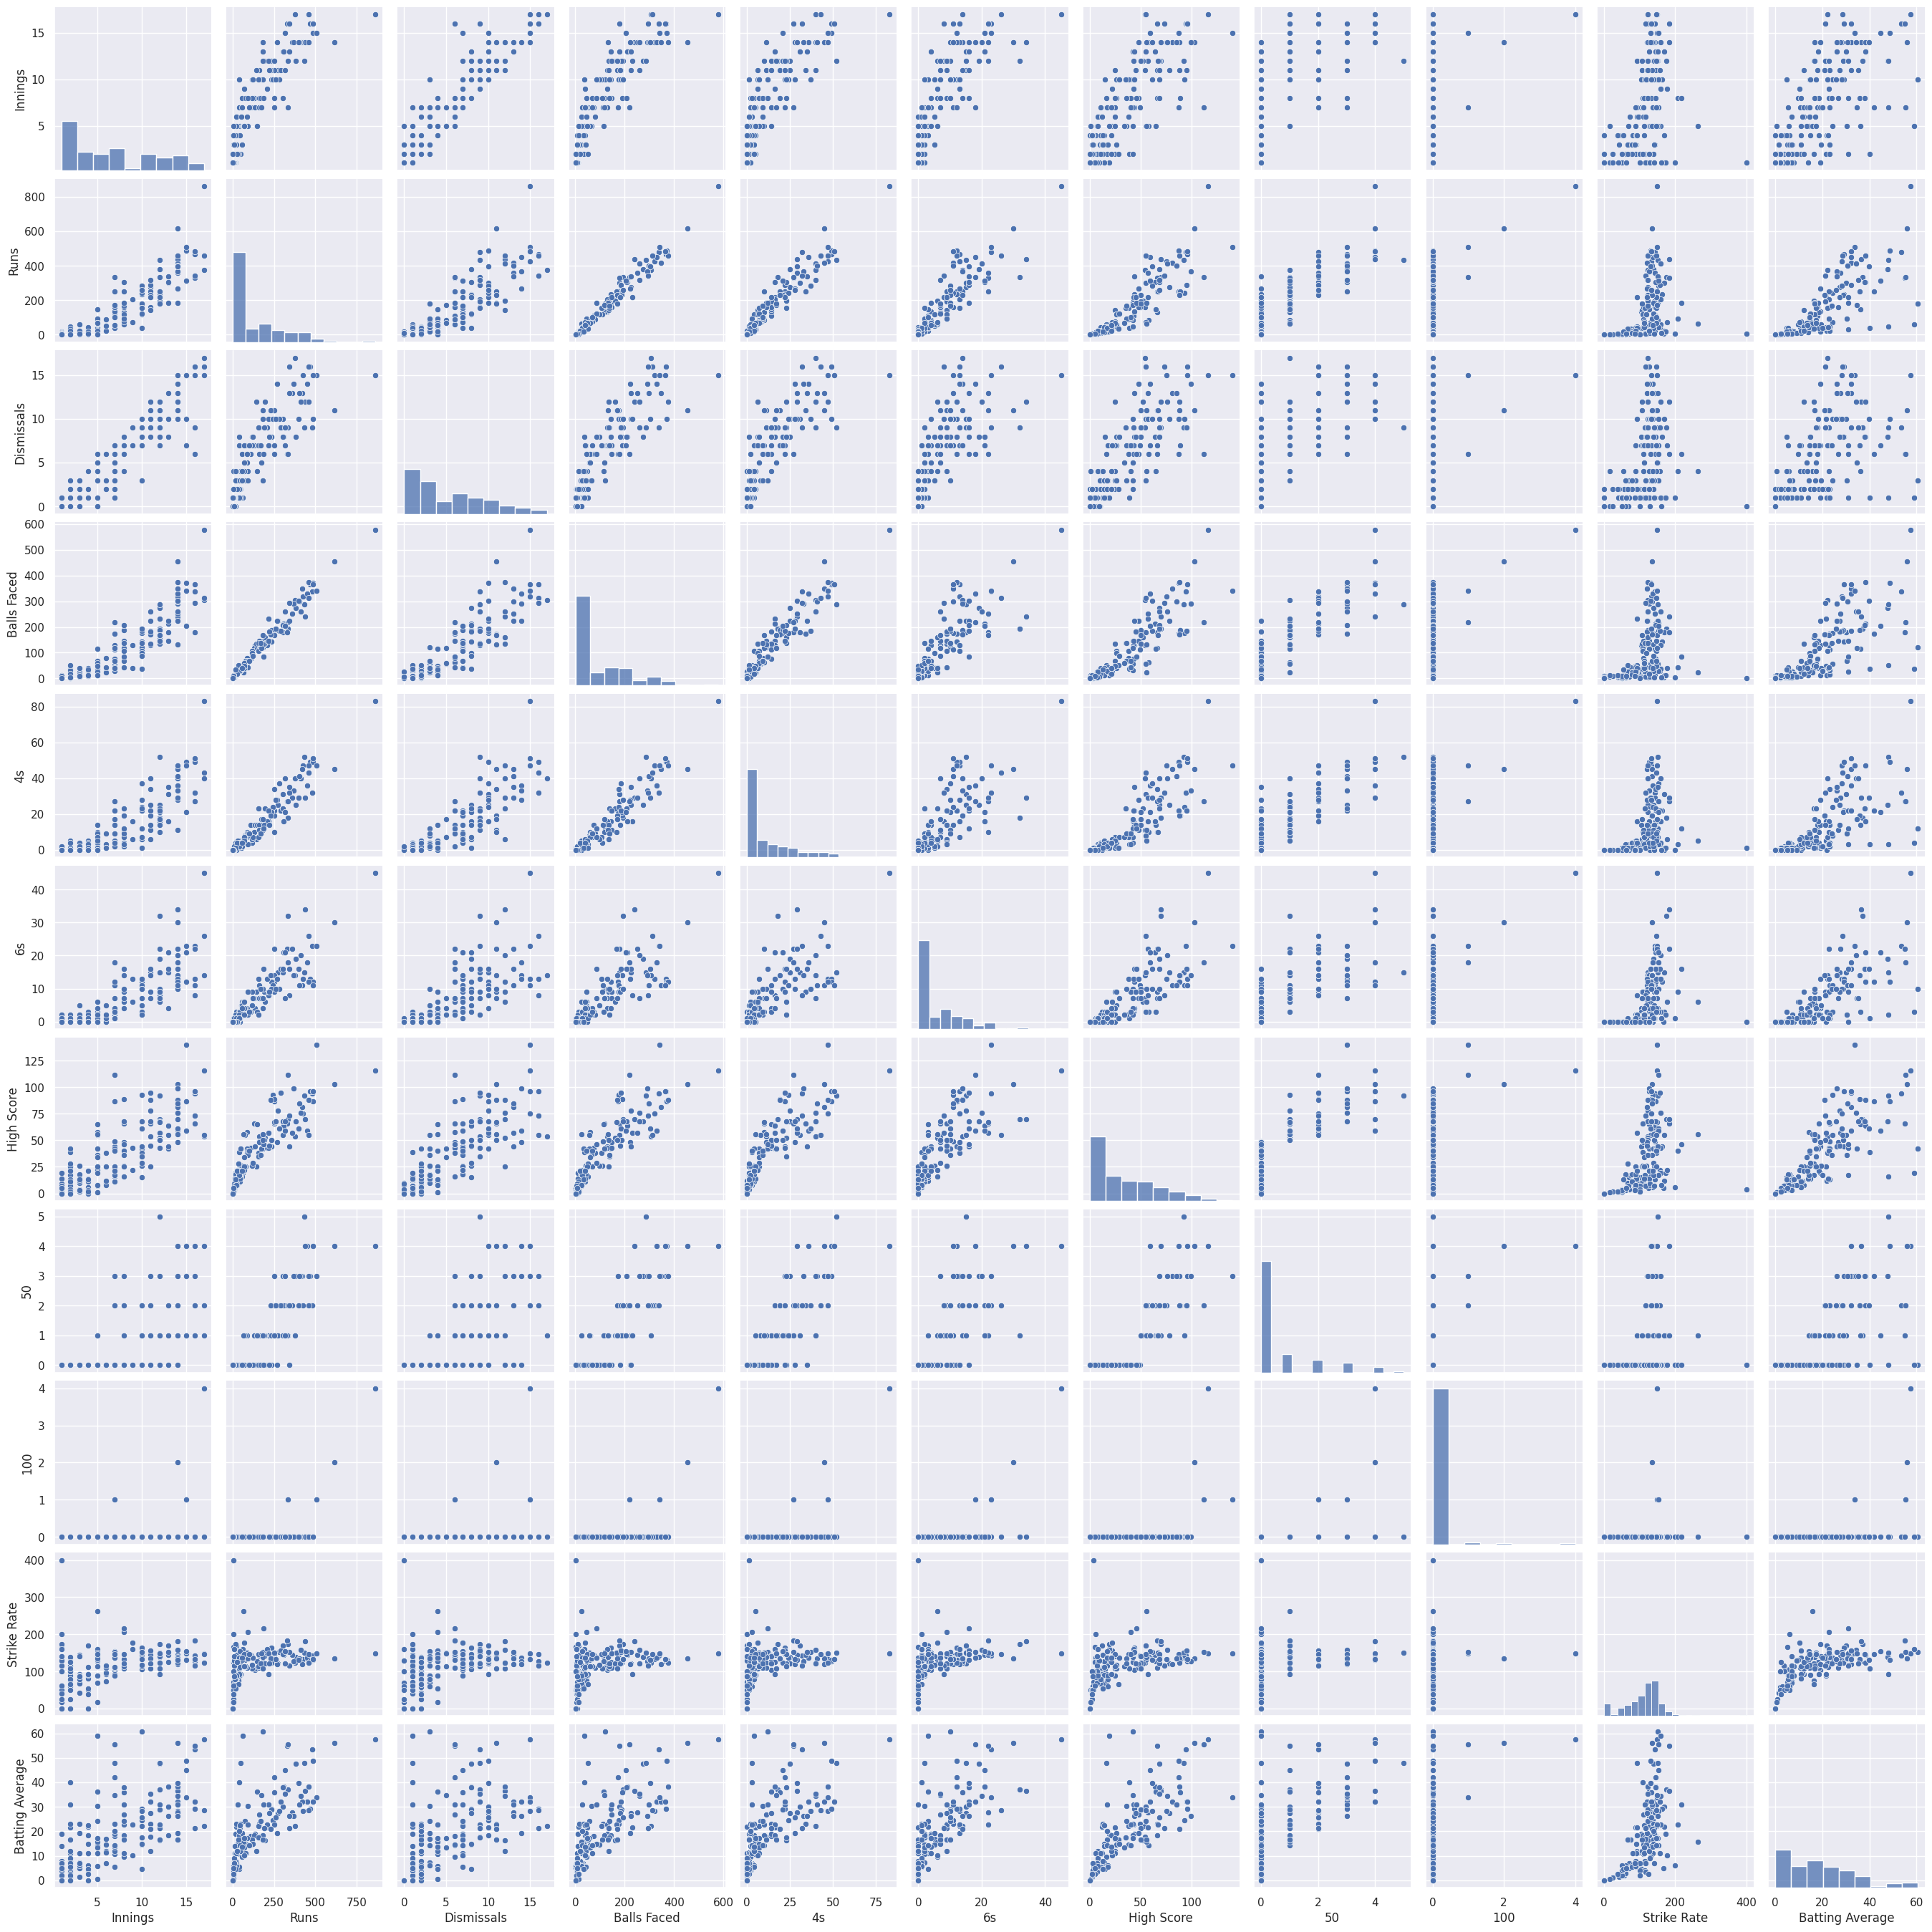

In [ ]:
sns.pairplot(dfBatsmen)

<ipython-input-124-2f48ae5eaaa2>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dfDeathBowling, x='Runs Conceded', hue='Wickets', multiple='stack')
<ipython-input-124-2f48ae5eaaa2>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dfDeathBowling, x='Runs Conceded', hue='Wickets', multiple='stack')


<Axes: xlabel='Runs Conceded', ylabel='Density'>

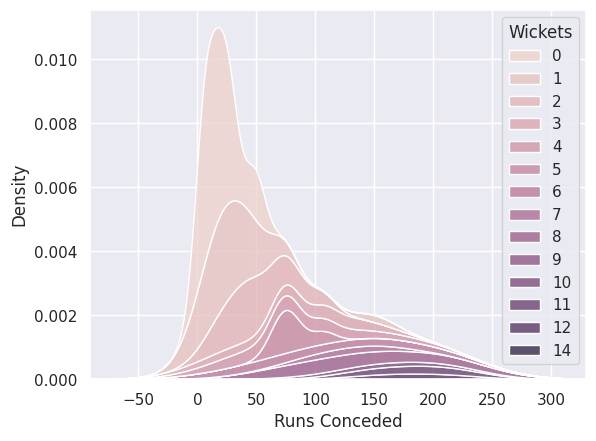

In [ ]:
sns.kdeplot(data=dfDeathBowling, x='Runs Conceded', hue='Wickets', multiple='stack')

<Axes: xlabel='Runs', ylabel='Dismissals'>

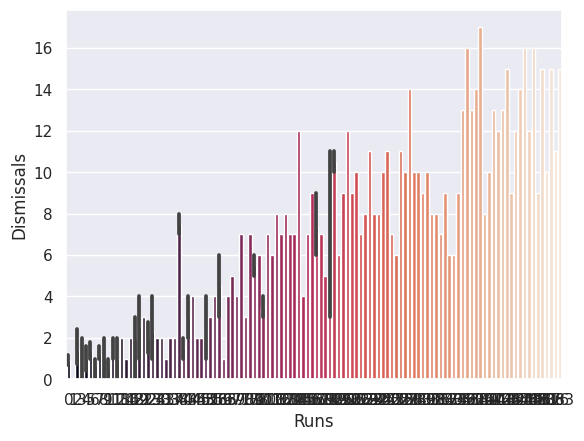

In [ ]:
sns.barplot(data=dfBatsmen, x='Runs', y='Dismissals', palette='rocket')

<Axes: xlabel='Wickets', ylabel='count'>

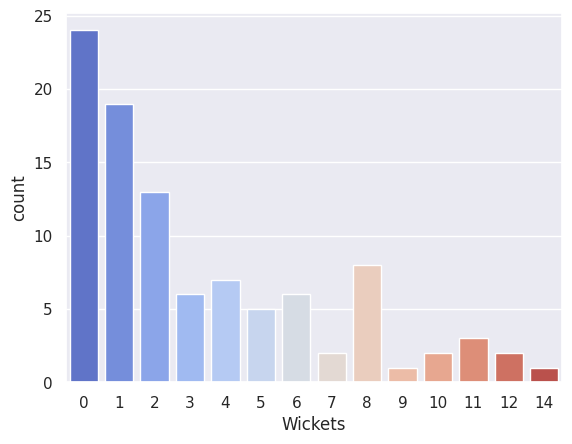

In [ ]:
sns.countplot(data=dfDeathBowling, x='Wickets', palette='coolwarm')

<Axes: xlabel='Innings', ylabel='Dismissals'>

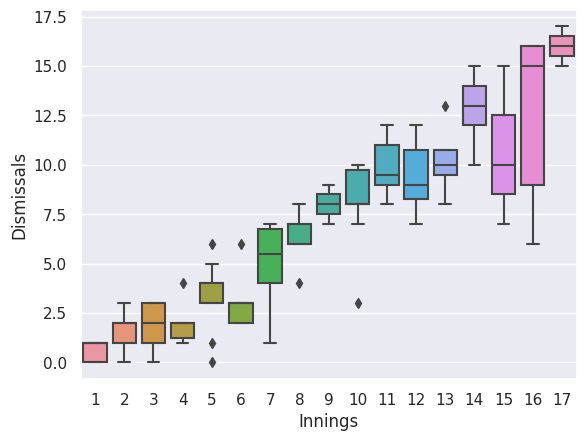

In [ ]:
sns.boxplot(data=dfBatsmen, x='Innings', y='Dismissals')

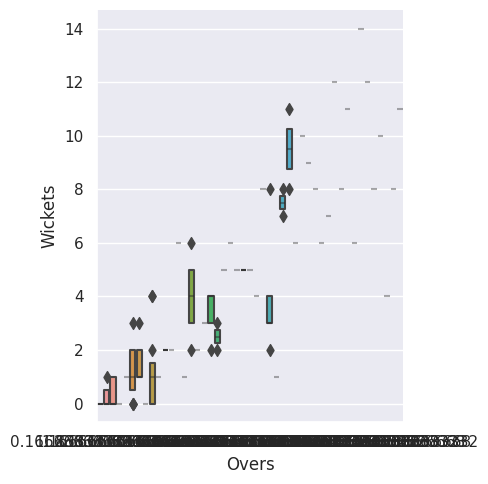

In [ ]:
sns.catplot(data=dfDeathBowling, x='Overs', y='Wickets',kind='boxen')

#Model creation ,analysis and prediction

#Batters model

In [ ]:

data

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average,Unnamed: 13,Dream 11 score,Unnamed: 15
0,A Badoni,Lucknow Super Giants,11,161,9,130,11,7,54,1,0,123.846154,17.888889,NaN,176,NaN
1,A Manohar,Gujarat Titans,7,108,6,75,14,3,43,0,0,144.000000,18.000000,NaN,116,NaN
2,A Nortje,Delhi Capitals,1,1,0,6,0,0,1,0,0,16.666667,inf,NaN,1,NaN
3,A Tomar,Kolkata Knight Riders,1,4,1,8,1,0,4,0,0,50.000000,4.000000,NaN,3,NaN
4,AD Russell,Kolkata Knight Riders,12,335,9,192,18,32,70,1,0,174.479167,37.222222,NaN,407,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,WP Saha,Gujarat Titans,11,317,9,259,40,7,68,3,0,122.393822,35.222222,NaN,377,NaN
170,Washington Sundar,Sunrisers Hyderabad,7,101,7,69,9,3,40,0,0,146.376812,14.428571,NaN,102,NaN
171,YBK Jaiswal,Rajasthan Royals,10,258,10,194,28,10,68,2,0,132.989691,25.800000,NaN,302,NaN
172,YS Chahal,Rajasthan Royals,1,5,1,8,0,0,5,0,0,62.500000,5.000000,NaN,3,NaN


In [ ]:
Q=data.drop(["Unnamed: 13","Unnamed: 15"],axis=1)

In [ ]:
Q

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average,Dream 11 score
0,A Badoni,Lucknow Super Giants,11,161,9,130,11,7,54,1,0,123.846154,17.888889,176
1,A Manohar,Gujarat Titans,7,108,6,75,14,3,43,0,0,144.000000,18.000000,116
2,A Nortje,Delhi Capitals,1,1,0,6,0,0,1,0,0,16.666667,inf,1
3,A Tomar,Kolkata Knight Riders,1,4,1,8,1,0,4,0,0,50.000000,4.000000,3
4,AD Russell,Kolkata Knight Riders,12,335,9,192,18,32,70,1,0,174.479167,37.222222,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,WP Saha,Gujarat Titans,11,317,9,259,40,7,68,3,0,122.393822,35.222222,377
170,Washington Sundar,Sunrisers Hyderabad,7,101,7,69,9,3,40,0,0,146.376812,14.428571,102
171,YBK Jaiswal,Rajasthan Royals,10,258,10,194,28,10,68,2,0,132.989691,25.800000,302
172,YS Chahal,Rajasthan Royals,1,5,1,8,0,0,5,0,0,62.500000,5.000000,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
C=["Batter","BattingTeam"]

for i in C:
    Q[i]=le.fit_transform(Q[i])

In [ ]:
Q.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
Q.dropna(inplace=True)

In [ ]:
Q

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average,Dream 11 score
0,0,4,11,161,9,130,11,7,54,1,0,123.846154,17.888889,176
1,1,2,7,108,6,75,14,3,43,0,0,144.000000,18.000000,116
3,3,3,1,4,1,8,1,0,4,0,0,50.000000,4.000000,3
4,4,3,12,335,9,192,18,32,70,1,0,174.479167,37.222222,407
5,5,3,5,86,6,61,10,3,58,1,0,140.983607,14.333333,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,2,11,317,9,259,40,7,68,3,0,122.393822,35.222222,377
170,170,9,7,101,7,69,9,3,40,0,0,146.376812,14.428571,102
171,171,7,10,258,10,194,28,10,68,2,0,132.989691,25.800000,302
172,172,7,1,5,1,8,0,0,5,0,0,62.500000,5.000000,3


In [ ]:
X=Q.drop(["Dream 11 score"],axis=1)

In [ ]:
X

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average
0,0,4,11,161,9,130,11,7,54,1,0,123.846154,17.888889
1,1,2,7,108,6,75,14,3,43,0,0,144.000000,18.000000
3,3,3,1,4,1,8,1,0,4,0,0,50.000000,4.000000
4,4,3,12,335,9,192,18,32,70,1,0,174.479167,37.222222
5,5,3,5,86,6,61,10,3,58,1,0,140.983607,14.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,2,11,317,9,259,40,7,68,3,0,122.393822,35.222222
170,170,9,7,101,7,69,9,3,40,0,0,146.376812,14.428571
171,171,7,10,258,10,194,28,10,68,2,0,132.989691,25.800000
172,172,7,1,5,1,8,0,0,5,0,0,62.500000,5.000000


In [ ]:
Y=Q["Dream 11 score"]

In [ ]:
Y

0      176
1      116
3        3
4      407
5       98
      ... 
169    377
170    102
171    302
172      3
173     -2
Name: Dream 11 score, Length: 164, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.8,random_state=42)

In [ ]:
len(xtrain),len(ytrain)

(131, 131)

In [ ]:
len(xtest),len(ytest)

(33, 33)

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
pip install catboost

In [ ]:
pip install xgboost

In [ ]:
Model1=RandomForestRegressor()
Model2=DecisionTreeRegressor ()
Model3=LinearRegression()
Model4=CatBoostRegressor()
Model5=AdaBoostRegressor()
Model6=XGBRegressor()

In [ ]:
Model1.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
Model2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
Model3.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
Model4.fit(xtrain,ytrain,verbose=0)

In [ ]:
Model5.fit(xtrain, ytrain)

AdaBoostRegressor()

In [ ]:
Model6.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
Model1.score(xtest,ytest)

0.9916382556626856

In [ ]:
Model2.score(xtest,ytest)

0.7027791256211011

In [ ]:
Model3.score(xtest,ytest)

1.0

In [ ]:
Model4.score(xtest,ytest)

0.992613978930173

In [ ]:
Model5.score(xtest,ytest)

0.9922345765509383

In [ ]:
Model6.score(xtest,ytest)

0.9816979425988535

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
ypred=Model3.predict(xtest)
ypred

array([ 1.7000000e+01,  4.2500000e+02,  3.2000000e+01,  4.9000000e+01,
        1.4000000e+01,  5.2700000e+02,  1.0000000e+00,  2.6400000e+02,
        4.6000000e+01,  5.0000000e+00,  1.7000000e+01,  1.6600000e+02,
        1.0000000e+01,  4.0000000e+00,  4.1800000e+02,  3.0000000e+01,
        9.8000000e+01,  4.1000000e+01,  4.5400000e+02,  1.4700000e+02,
        7.0000000e+00,  2.6000000e+01,  4.8500000e+02, -2.0000000e+00,
        1.5000000e+01,  3.7300000e+02,  2.3581137e-13,  1.4400000e+02,
        3.7100000e+02,  1.0200000e+02,  5.3700000e+02,  2.1000000e+01,
        1.3000000e+01])

In [ ]:

mse=mean_squared_error(ytest,ypred)
mse

6.94653880913533e-26

In [ ]:
import math
Rmse=math.sqrt(mse)
Rmse

2.6356287312774785e-13

#Bowlers model

In [ ]:
Data

,Bowlers,BowlingTeam,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate,Unnamed: 9,dream11
0,DG Nalkande,Gujarat Titans,6,0,1,0.166667,0.000000,0.000000,36.0,NaN,48
1,YBK Jaiswal,Rajasthan Royals,6,0,1,0.166667,0.000000,0.000000,36.0,NaN,48
2,S Dube,Chennai Super Kings,25,0,6,1.000000,0.000000,0.000000,25.0,NaN,200
3,HR Shokeen,Mumbai Indians,24,1,6,1.000000,0.041667,0.166667,24.0,NaN,217
4,DJ Hooda,Lucknow Super Giants,22,0,6,1.000000,0.000000,0.000000,22.0,NaN,176
...,...,...,...,...,...,...,...,...,...,...,...
94,Navdeep Saini,Rajasthan Royals,5,1,6,1.000000,0.200000,0.166667,5.0,NaN,65
95,SP Narine,Kolkata Knight Riders,47,2,60,10.000000,0.042553,0.033333,4.7,NaN,426
96,MM Ali,Chennai Super Kings,4,0,6,1.000000,0.000000,0.000000,4.0,NaN,32
97,M Ashwin,Mumbai Indians,3,0,6,1.000000,0.000000,0.000000,3.0,NaN,24


In [ ]:
K=Data.drop("Unnamed: 9",axis=1)

In [ ]:
le=LabelEncoder()
C=["Bowlers","BowlingTeam"]

for i in C:
    K [i]=le.fit_transform(K [i])

In [ ]:
K

,Bowlers,BowlingTeam,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate,dream11
0,16,2,6,0,1,0.166667,0.000000,0.000000,36.0,48
1,96,7,6,0,1,0.166667,0.000000,0.000000,36.0,48
2,76,0,25,0,6,1.000000,0.000000,0.000000,25.0,200
3,23,5,24,1,6,1.000000,0.041667,0.166667,24.0,217
4,18,4,22,0,6,1.000000,0.000000,0.000000,22.0,176
...,...,...,...,...,...,...,...,...,...,...
94,57,7,5,1,6,1.000000,0.200000,0.166667,5.0,65
95,80,3,47,2,60,10.000000,0.042553,0.033333,4.7,426
96,47,0,4,0,6,1.000000,0.000000,0.000000,4.0,32
97,42,5,3,0,6,1.000000,0.000000,0.000000,3.0,24


In [ ]:
X1=K.drop(["dream11"],axis=1)

In [ ]:
X1

,Bowlers,BowlingTeam,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,16,2,6,0,1,0.166667,0.000000,0.000000,36.0
1,96,7,6,0,1,0.166667,0.000000,0.000000,36.0
2,76,0,25,0,6,1.000000,0.000000,0.000000,25.0
3,23,5,24,1,6,1.000000,0.041667,0.166667,24.0
4,18,4,22,0,6,1.000000,0.000000,0.000000,22.0
...,...,...,...,...,...,...,...,...,...
94,57,7,5,1,6,1.000000,0.200000,0.166667,5.0
95,80,3,47,2,60,10.000000,0.042553,0.033333,4.7
96,47,0,4,0,6,1.000000,0.000000,0.000000,4.0
97,42,5,3,0,6,1.000000,0.000000,0.000000,3.0


In [ ]:
Y1=K ["dream11"]

In [ ]:
Y1

0      48
1      48
2     200
3     217
4     176
     ... 
94     65
95    426
96     32
97     24
98      8
Name: dream11, Length: 99, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y1,train_size=0.8,random_state=42)

In [ ]:
len(xtest),len(ytest)

(20, 20)

In [ ]:
len(xtrain),len(ytrain)

(79, 79)

In [ ]:
from sklearn.linear_model import LinearRegression
Model=LinearRegression()

In [ ]:
Model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
Model.score(xtest,ytest)

1.0

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
ypred=Model.predict(xtest)
ypred

array([1160.,  234.,  426.,  385.,   24.,  510.,  968.,  313.,  392.,
         48.,  811., 1606., 1686.,  378., 1980.,  176.,   56.,  306.,
        170.,   72.])

In [ ]:

mse=mean_squared_error(ytest,ypred)
mse

1.801865592607901e-25

In [ ]:
import math
Rmse=math.sqrt(mse)
Rmse

4.2448387397024883e-13

#dream 11 team

Dream11 is finded by using Excel

In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Share dfBatsmen (1).csv")
data

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average,Unnamed: 13,Dream 11 score,Unnamed: 15
0,A Badoni,Lucknow Super Giants,11,161,9,130,11,7,54,1,0,123.846154,17.888889,NaN,176,NaN
1,A Manohar,Gujarat Titans,7,108,6,75,14,3,43,0,0,144.000000,18.000000,NaN,116,NaN
2,A Nortje,Delhi Capitals,1,1,0,6,0,0,1,0,0,16.666667,inf,NaN,1,NaN
3,A Tomar,Kolkata Knight Riders,1,4,1,8,1,0,4,0,0,50.000000,4.000000,NaN,3,NaN
4,AD Russell,Kolkata Knight Riders,12,335,9,192,18,32,70,1,0,174.479167,37.222222,NaN,407,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,WP Saha,Gujarat Titans,11,317,9,259,40,7,68,3,0,122.393822,35.222222,NaN,377,NaN
170,Washington Sundar,Sunrisers Hyderabad,7,101,7,69,9,3,40,0,0,146.376812,14.428571,NaN,102,NaN
171,YBK Jaiswal,Rajasthan Royals,10,258,10,194,28,10,68,2,0,132.989691,25.800000,NaN,302,NaN
172,YS Chahal,Rajasthan Royals,1,5,1,8,0,0,5,0,0,62.500000,5.000000,NaN,3,NaN


In [ ]:
data.drop(["Unnamed: 15","Unnamed: 13"],axis=1)

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average,Dream 11 score
0,A Badoni,Lucknow Super Giants,11,161,9,130,11,7,54,1,0,123.846154,17.888889,176
1,A Manohar,Gujarat Titans,7,108,6,75,14,3,43,0,0,144.000000,18.000000,116
2,A Nortje,Delhi Capitals,1,1,0,6,0,0,1,0,0,16.666667,inf,1
3,A Tomar,Kolkata Knight Riders,1,4,1,8,1,0,4,0,0,50.000000,4.000000,3
4,AD Russell,Kolkata Knight Riders,12,335,9,192,18,32,70,1,0,174.479167,37.222222,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,WP Saha,Gujarat Titans,11,317,9,259,40,7,68,3,0,122.393822,35.222222,377
170,Washington Sundar,Sunrisers Hyderabad,7,101,7,69,9,3,40,0,0,146.376812,14.428571,102
171,YBK Jaiswal,Rajasthan Royals,10,258,10,194,28,10,68,2,0,132.989691,25.800000,302
172,YS Chahal,Rajasthan Royals,1,5,1,8,0,0,5,0,0,62.500000,5.000000,3


In [ ]:
D11bat=data.sort_values(by=("Dream 11 score"),ascending=False).head(6)
D11bat

,Batter,BattingTeam,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average,Unnamed: 13,Dream 11 score,Unnamed: 15
49,JC Buttler,Rajasthan Royals,17,863,15,579,83,45,116,4,4,149.050086,57.533333,NaN,1102,NaN
65,KL Rahul,Lucknow Super Giants,14,616,11,455,45,30,103,4,2,135.384615,56.000000,NaN,763,NaN
112,Q de Kock,Lucknow Super Giants,15,508,15,341,47,23,140,3,1,148.973607,33.866667,NaN,611,NaN
42,HH Pandya,Gujarat Titans,15,487,10,371,49,12,87,4,0,131.266846,48.700000,NaN,572,NaN
154,Shubman Gill,Gujarat Titans,16,483,15,365,51,11,96,4,0,132.328767,32.200000,NaN,558,NaN
28,DA Miller,Gujarat Titans,16,481,9,337,32,23,94,2,0,142.729970,53.444444,NaN,557,NaN


In [ ]:
Data=pd.read_csv("/content/drive/MyDrive/DFDEATHBOWLING.csv")
Data

,Bowlers,BowlingTeam,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate,Unnamed: 9,dream11
0,DG Nalkande,Gujarat Titans,6,0,1,0.166667,0.000000,0.000000,36.0,NaN,48
1,YBK Jaiswal,Rajasthan Royals,6,0,1,0.166667,0.000000,0.000000,36.0,NaN,48
2,S Dube,Chennai Super Kings,25,0,6,1.000000,0.000000,0.000000,25.0,NaN,200
3,HR Shokeen,Mumbai Indians,24,1,6,1.000000,0.041667,0.166667,24.0,NaN,217
4,DJ Hooda,Lucknow Super Giants,22,0,6,1.000000,0.000000,0.000000,22.0,NaN,176
...,...,...,...,...,...,...,...,...,...,...,...
94,Navdeep Saini,Rajasthan Royals,5,1,6,1.000000,0.200000,0.166667,5.0,NaN,65
95,SP Narine,Kolkata Knight Riders,47,2,60,10.000000,0.042553,0.033333,4.7,NaN,426
96,MM Ali,Chennai Super Kings,4,0,6,1.000000,0.000000,0.000000,4.0,NaN,32
97,M Ashwin,Mumbai Indians,3,0,6,1.000000,0.000000,0.000000,3.0,NaN,24


In [ ]:
Data.drop("Unnamed: 9",axis=1)

,Bowlers,BowlingTeam,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate,dream11
0,DG Nalkande,Gujarat Titans,6,0,1,0.166667,0.000000,0.000000,36.0,48
1,YBK Jaiswal,Rajasthan Royals,6,0,1,0.166667,0.000000,0.000000,36.0,48
2,S Dube,Chennai Super Kings,25,0,6,1.000000,0.000000,0.000000,25.0,200
3,HR Shokeen,Mumbai Indians,24,1,6,1.000000,0.041667,0.166667,24.0,217
4,DJ Hooda,Lucknow Super Giants,22,0,6,1.000000,0.000000,0.000000,22.0,176
...,...,...,...,...,...,...,...,...,...,...
94,Navdeep Saini,Rajasthan Royals,5,1,6,1.000000,0.200000,0.166667,5.0,65
95,SP Narine,Kolkata Knight Riders,47,2,60,10.000000,0.042553,0.033333,4.7,426
96,MM Ali,Chennai Super Kings,4,0,6,1.000000,0.000000,0.000000,4.0,32
97,M Ashwin,Mumbai Indians,3,0,6,1.000000,0.000000,0.000000,3.0,24


In [ ]:
D11bow=Data.sort_values(by=("dream11"),ascending=False).head(5)
D11bow

,Bowlers,BowlingTeam,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate,Unnamed: 9,dream11
55,M Prasidh Krishna,Rajasthan Royals,238,8,137,22.833333,0.033613,0.058394,10.423358,NaN,2104
66,HV Patel,Royal Challengers Bangalore,220,11,141,23.500000,0.050000,0.078014,9.361702,NaN,2035
44,T Natarajan,Sunrisers Hyderabad,210,12,114,19.000000,0.057143,0.105263,11.052632,NaN,1980
34,SN Thakur,Delhi Capitals,209,8,104,17.333333,0.038278,0.076923,12.057692,NaN,1872
71,B Kumar,Sunrisers Hyderabad,192,10,127,21.166667,0.052083,0.078740,9.070866,NaN,1786


In [ ]:
Df1=pd.DataFrame(D11bat)

In [ ]:
B=Df1[["Batter","BattingTeam","Dream 11 score"]]
B

,Batter,BattingTeam,Dream 11 score
49,JC Buttler,Rajasthan Royals,1102
65,KL Rahul,Lucknow Super Giants,763
112,Q de Kock,Lucknow Super Giants,611
42,HH Pandya,Gujarat Titans,572
154,Shubman Gill,Gujarat Titans,558
28,DA Miller,Gujarat Titans,557


In [ ]:
Df2=pd.DataFrame(D11bow)

In [ ]:
C=Df1[["Bowlers","BowlingTeam","dream11"]]
C

,Bowlers,BowlingTeam,dream11
55,M Prasidh Krishna,Rajasthan Royals,2104
66,HV Patel,Royal Challengers Bangalore,2035
44,T Natarajan,Sunrisers Hyderabad,1980
34,SN Thakur,Delhi Capitals,1872
71,B Kumar,Sunrisers Hyderabad,1786


In [ ]:
D=B.set_axis(["player","Team","dream11"],axis=1)
D

,player,Team,dream11
49,JC Buttler,Rajasthan Royals,1102
65,KL Rahul,Lucknow Super Giants,763
112,Q de Kock,Lucknow Super Giants,611
42,HH Pandya,Gujarat Titans,572
154,Shubman Gill,Gujarat Titans,558
28,DA Miller,Gujarat Titans,557


In [ ]:
E=C.set_axis(["player","Team","dream11"],axis=1)
E

,player,Team,dream11
55,M Prasidh Krishna,Rajasthan Royals,2104
66,HV Patel,Royal Challengers Bangalore,2035
44,T Natarajan,Sunrisers Hyderabad,1980
34,SN Thakur,Delhi Capitals,1872
71,B Kumar,Sunrisers Hyderabad,1786


In [ ]:
Dream11=pd.concat([D, E], ignore_index=True)

In [ ]:
Dream11

,player,Team,dream11
0,JC Buttler,Rajasthan Royals,1102
1,KL Rahul,Lucknow Super Giants,763
2,Q de Kock,Lucknow Super Giants,611
3,HH Pandya,Gujarat Titans,572
4,Shubman Gill,Gujarat Titans,558
5,DA Miller,Gujarat Titans,557
6,M Prasidh Krishna,Rajasthan Royals,2104
7,HV Patel,Royal Challengers Bangalore,2035
8,T Natarajan,Sunrisers Hyderabad,1980
9,SN Thakur,Delhi Capitals,1872
